In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


#  **Loading the Dataset**

In [2]:
training_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')


In [3]:
training_data.shape

(20000, 22)

In [4]:
training_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [5]:
training_data.dtypes

Location                  object
Cross_Street              object
Latitude                 float64
Longitude                float64
Date_Reported             object
Date_Occurred             object
Time_Occurred            float64
Area_ID                  float64
Area_Name                 object
Reporting_District_no    float64
Part 1-2                 float64
Modus_Operandi            object
Victim_Age               float64
Victim_Sex                object
Victim_Descent            object
Premise_Code             float64
Premise_Description       object
Weapon_Used_Code         float64
Weapon_Description        object
Status                    object
Status_Description        object
Crime_Category            object
dtype: object

In [6]:
training_data['Date_Occurred']=pd.to_datetime(training_data['Date_Occurred'])
training_data['Date_Reported']=pd.to_datetime(training_data['Date_Reported'])


/tmp/ipykernel_17/37356444.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_data['Date_Occurred']=pd.to_datetime(training_data['Date_Occurred'])
/tmp/ipykernel_17/37356444.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  training_data['Date_Reported']=pd.to_datetime(training_data['Date_Reported'])


In [7]:
training_data.dtypes

Location                         object
Cross_Street                     object
Latitude                        float64
Longitude                       float64
Date_Reported            datetime64[ns]
Date_Occurred            datetime64[ns]
Time_Occurred                   float64
Area_ID                         float64
Area_Name                        object
Reporting_District_no           float64
Part 1-2                        float64
Modus_Operandi                   object
Victim_Age                      float64
Victim_Sex                       object
Victim_Descent                   object
Premise_Code                    float64
Premise_Description              object
Weapon_Used_Code                float64
Weapon_Description               object
Status                           object
Status_Description               object
Crime_Category                   object
dtype: object

In [8]:

training_data['Month_Occurred'] = training_data['Date_Occurred'].dt.month_name()


In [9]:
td=training_data

In [10]:
td

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category,Month_Occurred
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,2020-03-09,2020-03-06,1800.0,15.0,N Hollywood,1563.0,...,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes,March
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,2020-02-27,2020-02-27,1345.0,13.0,Newton,1367.0,...,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,February
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,2020-08-21,2020-08-21,605.0,13.0,Newton,1343.0,...,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes,August
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,2020-11-08,2020-11-06,1800.0,19.0,Mission,1924.0,...,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes,November
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,2020-02-25,2020-02-25,1130.0,12.0,77th Street,1245.0,...,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,2020-05-24,2020-05-24,700.0,3.0,Southwest,303.0,...,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes,May
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,2020-12-25,2020-12-25,259.0,10.0,West Valley,1008.0,...,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes,December
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,2020-09-25,2020-09-25,1400.0,8.0,West LA,849.0,...,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,Property Crimes,September
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,2020-06-10,2020-06-10,600.0,5.0,Harbor,558.0,...,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Crimes against Public Order,June


# **EDA**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
td['Crime_Category'].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

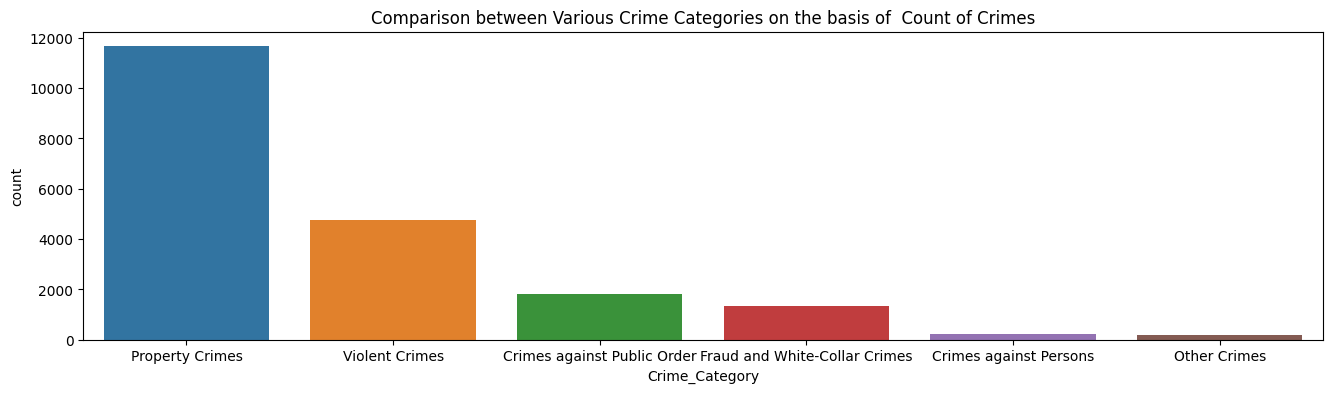

In [13]:
plt.figure(figsize=(16,4))
sns.countplot(data=td, x='Crime_Category',order=td['Crime_Category'].value_counts().index)
plt.title("Comparison between Various Crime Categories on the basis of  Count of Crimes")           
plt.show()


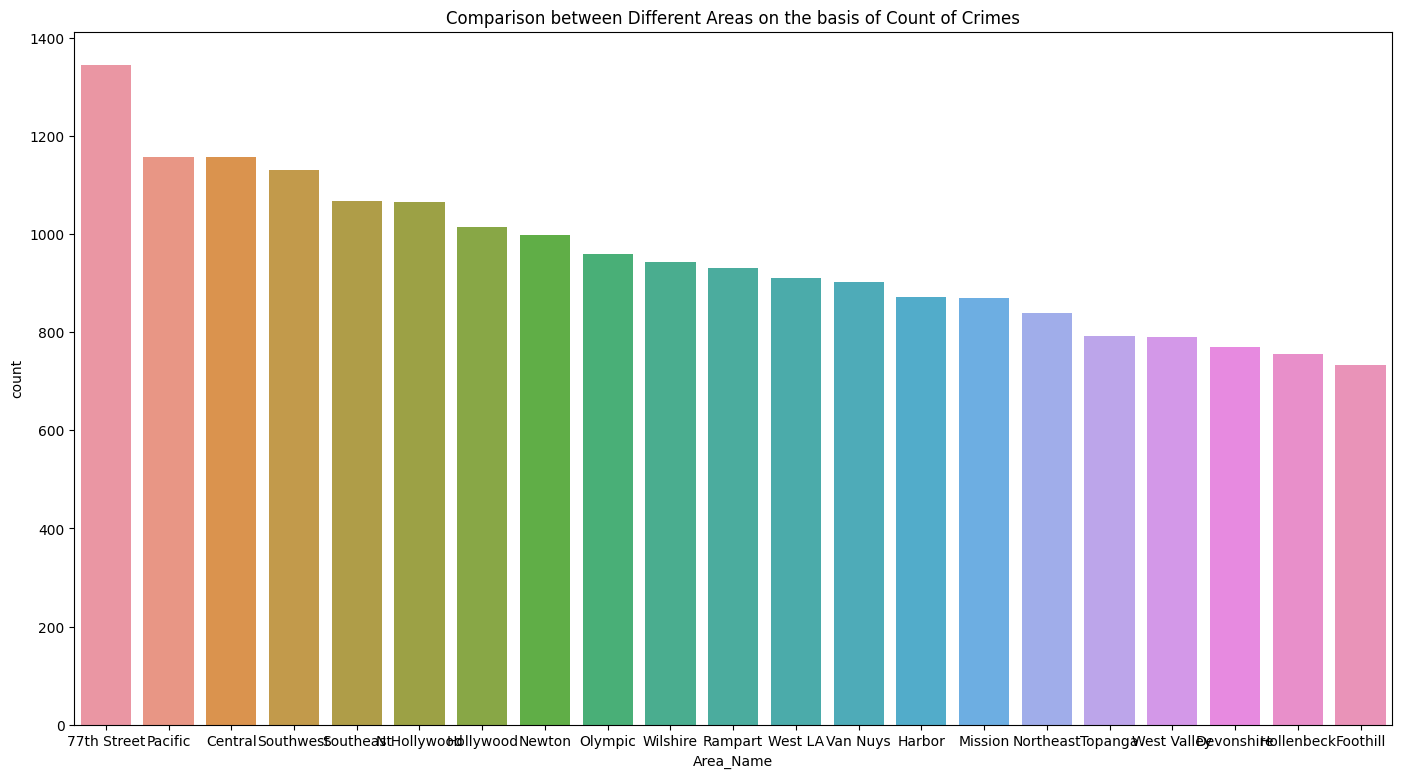

In [14]:
plt.figure(figsize=(17,9))
sns.countplot(data=td, x='Area_Name',order=td['Area_Name'].value_counts().index)
plt.title("Comparison between Different Areas on the basis of Count of Crimes")
plt.show()


In [15]:
td.Weapon_Description.value_counts()
#Most used weapon is STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)

Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    3990
UNKNOWN WEAPON/OTHER WEAPON                        789
VERBAL THREAT                                      546
HAND GUN                                           388
KNIFE WITH BLADE 6INCHES OR LESS                   160
SEMI-AUTOMATIC PISTOL                              154
UNKNOWN FIREARM                                    131
OTHER KNIFE                                        125
VEHICLE                                             84
MACE/PEPPER SPRAY                                   80
ROCK/THROWN OBJECT                                  63
BOTTLE                                              55
PIPE/METAL PIPE                                     52
CLUB/BAT                                            51
STICK                                               49
KITCHEN KNIFE                                       45
KNIFE WITH BLADE OVER 6 INCHES IN LENGTH            43
AIR PISTOL/REVOLVER/RIFLE/BB GUN              

Text(0.5, 1.0, 'Heat map showing frequency of different status descriptions for each crime category')

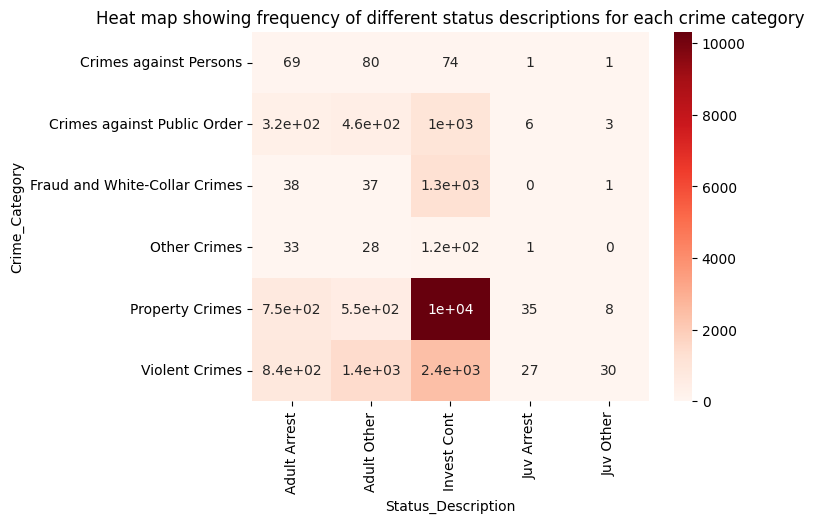

In [16]:
cross_tab1 = pd.crosstab(td['Crime_Category'], td['Status_Description'])
sns.heatmap(cross_tab1,annot=True, cmap='Reds')
plt.title("Heat map showing frequency of different status descriptions for each crime category")

Text(0.5, 1.0, 'Heat map showing frequency of crimes in different Area for each crime category')

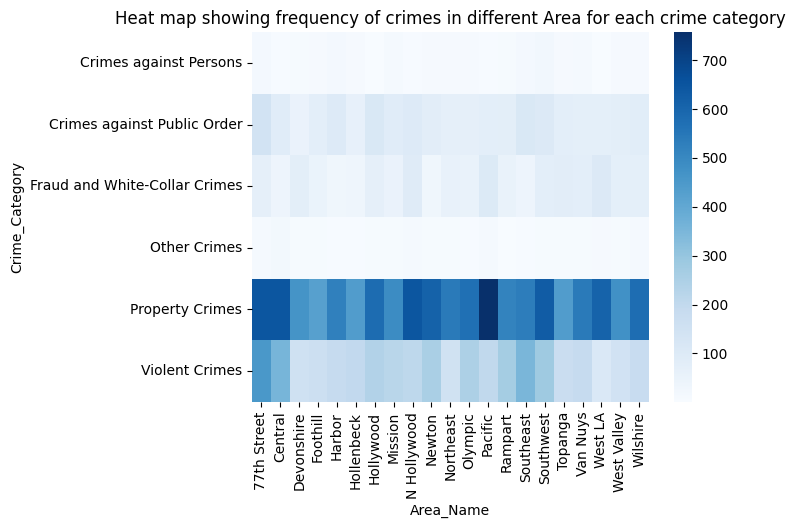

In [17]:
cross_tab2 = pd.crosstab(td['Crime_Category'], td['Area_Name'])
sns.heatmap(cross_tab2, cmap='Blues')
plt.title("Heat map showing frequency of crimes in different Area for each crime category")

In [18]:
timeseries=td.groupby(td['Date_Occurred'])['Date_Occurred'].value_counts()


In [19]:
timeseries

Date_Occurred
2020-01-01    137
2020-01-02     43
2020-01-03     57
2020-01-04     53
2020-01-05     59
             ... 
2020-12-27     48
2020-12-28     55
2020-12-29     45
2020-12-30     47
2020-12-31     67
Name: count, Length: 366, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


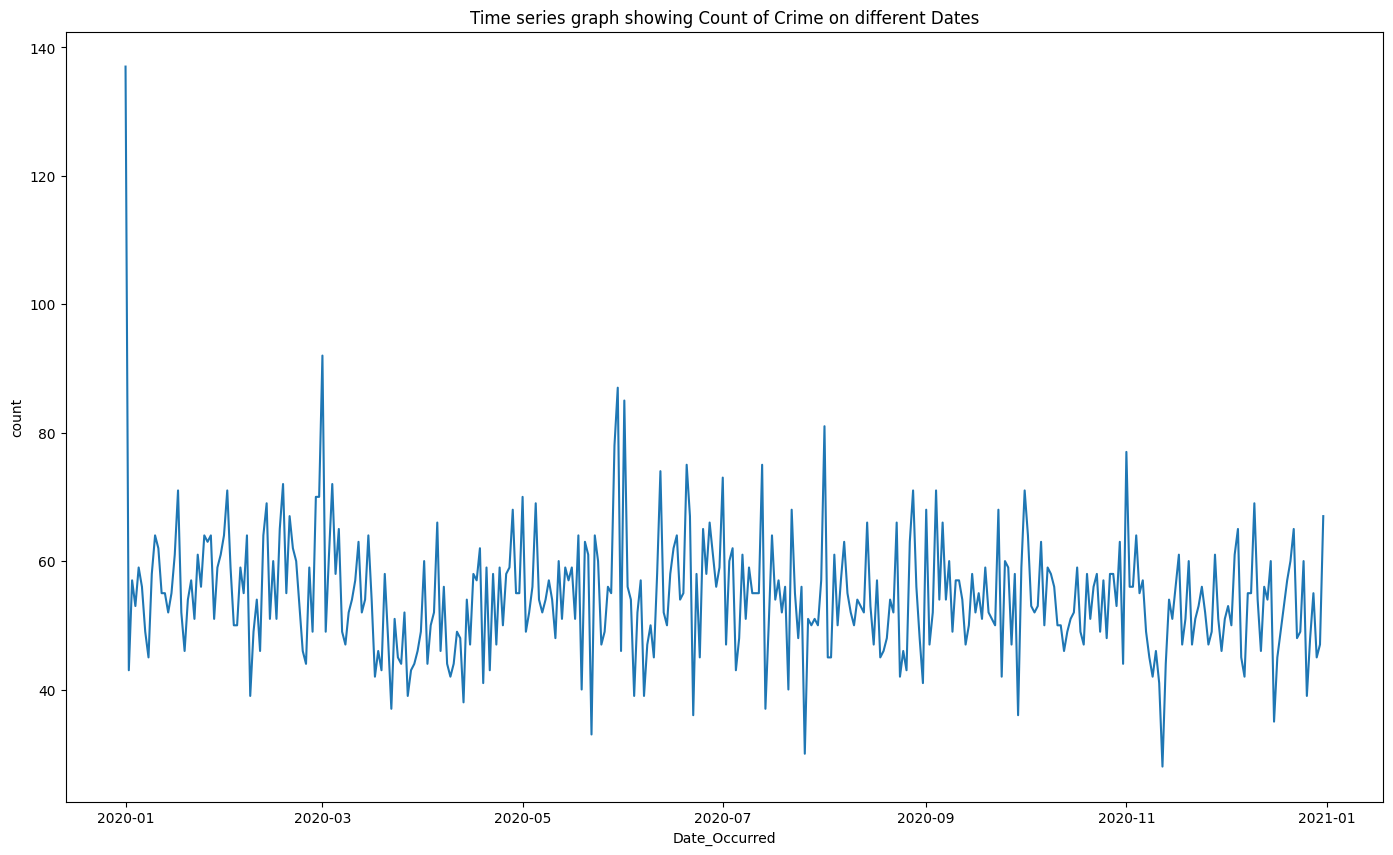

In [20]:
plt.figure(figsize=(17,10))
sns.lineplot(data=timeseries)
plt.title("Time series graph showing Count of Crime on different Dates")
plt.show()

In [21]:
td.Month_Occurred.value_counts()

Month_Occurred
January      1835
May          1755
June         1697
October      1685
July         1670
February     1663
August       1662
September    1643
December     1638
March        1630
April        1569
November     1553
Name: count, dtype: int64

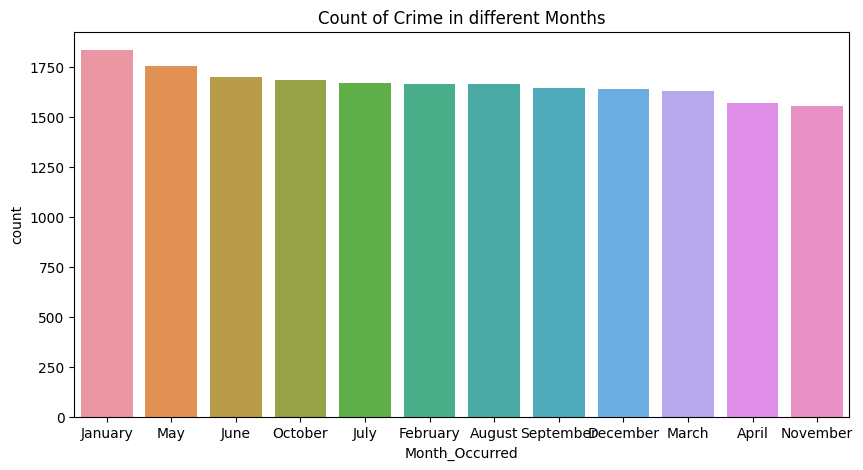

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=td, x='Month_Occurred',order=td['Month_Occurred'].value_counts().index)
plt.title("Count of Crime in different Months")
plt.show()

# **Data Preprocessing**

In [23]:
training_data

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category,Month_Occurred
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,2020-03-09,2020-03-06,1800.0,15.0,N Hollywood,1563.0,...,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes,March
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,2020-02-27,2020-02-27,1345.0,13.0,Newton,1367.0,...,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,February
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,2020-08-21,2020-08-21,605.0,13.0,Newton,1343.0,...,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes,August
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,2020-11-08,2020-11-06,1800.0,19.0,Mission,1924.0,...,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes,November
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,2020-02-25,2020-02-25,1130.0,12.0,77th Street,1245.0,...,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,2020-05-24,2020-05-24,700.0,3.0,Southwest,303.0,...,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes,May
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,2020-12-25,2020-12-25,259.0,10.0,West Valley,1008.0,...,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes,December
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,2020-09-25,2020-09-25,1400.0,8.0,West LA,849.0,...,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,Property Crimes,September
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,2020-06-10,2020-06-10,600.0,5.0,Harbor,558.0,...,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Crimes against Public Order,June


In [24]:
training_data.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
Month_Occurred               0
dtype: int64

In [25]:
training_data.drop(columns=['Cross_Street','Date_Reported'],inplace=True)
#Dropping 'Cross_Street' column as it has maximum null values and 'Date_Reported'column as it has duplicate values of 'Date_Occurred'

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
x = training_data.drop('Crime_Category', axis=1)
y = training_data['Crime_Category']

In [28]:
x_train,x_val, y_train, y_val= train_test_split(x,y,random_state=42,test_size=0.1,shuffle=True)

In [29]:
numerical_columns = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code',
       'Weapon_Used_Code']

categorical_columns = ['Location',
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description', 'Month_Occurred','Date_Occurred']

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [31]:
numerical_pipe= Pipeline([('imputer', SimpleImputer(strategy='mean')),
                         ('scaler', StandardScaler())])

In [32]:
categorical_pipe= Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                         ('Encoder', OneHotEncoder(handle_unknown='ignore'))])

In [33]:
ct=ColumnTransformer([('numeric', numerical_pipe, numerical_columns),
                      ('categoric', categorical_pipe, categorical_columns)])

In [34]:
x_train

,Location,Latitude,Longitude,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Month_Occurred
16270,1800 CRENSHAW BL,34.0429,-118.3329,2020-09-16,1800.0,7.0,Wilshire,777.0,2.0,0342,39.0,M,A,121.0,YARD (RESIDENTIAL/BUSINESS),NaN,NaN,IC,Invest Cont,September
1383,21200 OXNARD ST,34.1837,-118.5846,2020-12-22,1200.0,21.0,Topanga,2158.0,1.0,0394,27.0,M,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,December
3472,800 SANTEE ST,34.0401,-118.2533,2020-07-02,2130.0,1.0,Central,176.0,1.0,1606 0344 0321 1822,33.0,M,B,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,July
19900,4000 S MCCLUNG DR,34.0164,-118.3312,2020-04-24,700.0,3.0,Southwest,373.0,1.0,1606 0344 0354 1822 0202 1202 1300,60.0,F,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,April
2150,5000 S SLAUSON AV,33.9954,-118.4097,2020-09-27,1515.0,14.0,Pacific,1458.0,2.0,2000 0913 1814 0416 0444,34.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,400 S MAIN ST,34.0478,-118.2484,2020-01-12,330.0,1.0,Central,144.0,1.0,0913 2000 1243 0444 0429,36.0,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,January
11964,100 S AVENUE 64,34.1225,-118.1818,2020-09-04,1500.0,11.0,Northeast,1128.0,1.0,NaN,0.0,NaN,NaN,707.0,GARAGE/CARPORT,NaN,NaN,IC,Invest Cont,September
5390,500 N LARCHMONT BL,34.0790,-118.3236,2020-12-14,1100.0,7.0,Wilshire,719.0,1.0,NaN,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,December
860,2100 W 84TH ST,33.9627,-118.3178,2020-08-02,1230.0,12.0,77th Street,1263.0,2.0,2000 0913 1813 1821 0416 0444,34.0,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,August


In [35]:
print(numerical_columns)
print(categorical_columns)

['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code']
['Location', 'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent', 'Premise_Description', 'Weapon_Description', 'Status', 'Status_Description', 'Month_Occurred', 'Date_Occurred']


# **Model 1(using Gradient Boosting Classifier) and Hyperparameter tuning**

In [36]:

model1  = Pipeline([ ('Column_Transformer', ct),
    ('classifier1',GradientBoostingClassifier(n_estimators=100))
])


In [37]:
param_grid1 = {
    'classifier1__max_depth': [3,5,7],
    'classifier1__learning_rate': [0.1, 0.2]
}



In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid_search1 = GridSearchCV(model1, param_grid1, cv=3, n_jobs=-1, scoring='accuracy')  
grid_search1.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Column_Transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'Time_Occurred',
                                                                          'Area_ID',
                                                                          'Reporting_District_no',
                                                                          'Part '
                                                                          '1-2',
                                                                          'Victim_Age',
                                                                          'Premise_Code',
                                                                          'Weapon_Used_Code']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('i...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'Area_Name',
                                                                          'Modus_Operandi',
                                                                          'Victim_Sex',
                                                                          'Victim_Descent',
                                                                          'Premise_Description',
                                                                          'Weapon_Description',
                                                                          'Status',
                                                                          'Status_Description',
                                                                          'Month_Occurred',
                                                                          'Date_Occurred'])])),
                                       ('classifier1',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier1__learning_rate': [0.1, 0.2],
                         'classifier1__max_depth': [3, 5, 7]},
             scoring='accuracy')

In [40]:
grid_search1.best_params_

{'classifier1__learning_rate': 0.2, 'classifier1__max_depth': 5}

In [41]:
grid_search1.best_score_

0.8860555555555556

In [42]:
grid_search1.best_estimator_.fit(x_train, y_train)
y_pred11=grid_search1.best_estimator_.predict(x_val)

In [43]:
import sklearn.metrics as skm
skm.accuracy_score(y_val,y_pred11)

0.89

In [44]:
print(skm.classification_report(y_val,y_pred11))


                               precision    recall  f1-score   support

       Crimes against Persons       0.60      0.67      0.63        18
  Crimes against Public Order       0.83      0.61      0.70       181
Fraud and White-Collar Crimes       0.73      0.84      0.78       139
                 Other Crimes       0.00      0.00      0.00        19
              Property Crimes       0.95      0.94      0.95      1151
               Violent Crimes       0.84      0.93      0.88       492

                     accuracy                           0.89      2000
                    macro avg       0.66      0.66      0.66      2000
                 weighted avg       0.89      0.89      0.89      2000



In [45]:
print(skm.confusion_matrix(y_val,y_pred11))

[[  12    0    0    0    0    6]
 [   2  110   27    1   11   30]
 [   1    7  117    1   13    0]
 [   0    4    7    0    8    0]
 [   1    6    9    1 1084   50]
 [   4    6    0    2   23  457]]


# **Model 2(using SVM algorithm) and Hyperparameter tuning**

In [46]:
model2 = Pipeline([
    ('column_transformer', ct),
    ('classifier2',SVC())
])
param_grid2 = {
   'classifier2__C': [0.1, 1],  
              'classifier2__gamma': ['scale','auto',1.0 ,0.1], 
              'classifier2__kernel': ['poly']
                                      }
grid_search2 = GridSearchCV(model2, param_grid2, cv=3, n_jobs=-1, scoring='accuracy')  
grid_search2.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'Time_Occurred',
                                                                          'Area_ID',
                                                                          'Reporting_District_no',
                                                                          'Part '
                                                                          '1-2',
                                                                          'Victim_Age',
                                                                          'Premise_Code',
                                                                          'Weapon_Used_Code']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('i...
                                                                         ['Location',
                                                                          'Area_Name',
                                                                          'Modus_Operandi',
                                                                          'Victim_Sex',
                                                                          'Victim_Descent',
                                                                          'Premise_Description',
                                                                          'Weapon_Description',
                                                                          'Status',
                                                                          'Status_Description',
                                                                          'Month_Occurred',
                                                                          'Date_Occurred'])])),
                                       ('classifier2', SVC())]),
             n_jobs=-1,
             param_grid={'classifier2__C': [0.1, 1],
                         'classifier2__gamma': ['scale', 'auto', 1.0, 0.1],
                         'classifier2__kernel': ['poly']},
             scoring='accuracy')

In [47]:
grid_search2.best_params_

{'classifier2__C': 0.1,
 'classifier2__gamma': 1.0,
 'classifier2__kernel': 'poly'}

In [48]:
grid_search2.best_score_

0.8672222222222222

In [49]:
grid_search2.best_estimator_.fit(x_train, y_train)
y_pred12=grid_search2.best_estimator_.predict(x_val)

In [50]:
skm.accuracy_score(y_val,y_pred12)

0.869

In [51]:
print(skm.classification_report(y_val,y_pred12))


                               precision    recall  f1-score   support

       Crimes against Persons       0.40      0.22      0.29        18
  Crimes against Public Order       0.71      0.61      0.66       181
Fraud and White-Collar Crimes       0.74      0.83      0.78       139
                 Other Crimes       0.33      0.05      0.09        19
              Property Crimes       0.93      0.94      0.93      1151
               Violent Crimes       0.82      0.88      0.85       492

                     accuracy                           0.87      2000
                    macro avg       0.66      0.59      0.60      2000
                 weighted avg       0.86      0.87      0.86      2000



In [52]:
print(skm.confusion_matrix(y_val,y_pred12))

[[   4    1    1    0    0   12]
 [   1  110   20    2   17   31]
 [   0    9  115    0   13    2]
 [   0    5    7    1    6    0]
 [   3   14   10    0 1077   47]
 [   2   15    2    0   42  431]]


#  **Model 3(using Logistic Regression) and Hyperparameter tuning**

In [53]:
model3 = Pipeline([
    ('column_transformer', ct),
    ('classifier3', LogisticRegression(max_iter=1000))
])
param_grid3 = {
   'classifier3__C': [0.1,1,10],
    'classifier3__penalty': ['l1','l2','elasticnet','none']
                                      }
grid_search3 = GridSearchCV(model3, param_grid3, cv=3, n_jobs=-1, scoring='accuracy')  
grid_search3.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Latitude',
                                                                          'Longitude',
                                                                          'Time_Occurred',
                                                                          'Area_ID',
                                                                          'Reporting_District_no',
                                                                          'Part '
                                                                          '1-2',
                                                                          'Victim_Age',
                                                                          'Premise_Code',
                                                                          'Weapon_Used_Code']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('i...
                                                                         ['Location',
                                                                          'Area_Name',
                                                                          'Modus_Operandi',
                                                                          'Victim_Sex',
                                                                          'Victim_Descent',
                                                                          'Premise_Description',
                                                                          'Weapon_Description',
                                                                          'Status',
                                                                          'Status_Description',
                                                                          'Month_Occurred',
                                                                          'Date_Occurred'])])),
                                       ('classifier3',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier3__C': [0.1, 1, 10],
                         'classifier3__penalty': ['l1', 'l2', 'elasticnet',
                                                  'none']},
             scoring='accuracy')

In [54]:
grid_search3.best_params_

{'classifier3__C': 10, 'classifier3__penalty': 'l2'}

In [55]:
grid_search3.best_score_

0.8526111111111111

In [56]:
grid_search3.best_estimator_.fit(x_train, y_train)
y_pred13=grid_search3.best_estimator_.predict(x_val)
skm.accuracy_score(y_val,y_pred13)

0.8575

In [57]:
print(skm.classification_report(y_val,y_pred13))

                               precision    recall  f1-score   support

       Crimes against Persons       0.40      0.11      0.17        18
  Crimes against Public Order       0.72      0.59      0.65       181
Fraud and White-Collar Crimes       0.80      0.83      0.81       139
                 Other Crimes       0.00      0.00      0.00        19
              Property Crimes       0.93      0.94      0.93      1151
               Violent Crimes       0.77      0.82      0.79       492

                     accuracy                           0.86      2000
                    macro avg       0.60      0.55      0.56      2000
                 weighted avg       0.85      0.86      0.85      2000



In [58]:
print(skm.confusion_matrix(y_val,y_pred13))

[[   2    2    1    0    0   13]
 [   2  107   17    2   12   41]
 [   0    7  115    0    5   12]
 [   0    5    4    0    1    9]
 [   0   10    7    0 1086   48]
 [   1   18    0    0   68  405]]


# **Prediction on Test data using the Best Model(Model1 : Gradient Boosting Classifier)**

In [59]:
test_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

In [60]:
test_data['Date_Occurred']=pd.to_datetime(test_data['Date_Occurred'])
test_data['Month_Occurred'] = test_data['Date_Occurred'].dt.month_name()


/tmp/ipykernel_17/1312291385.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Date_Occurred']=pd.to_datetime(test_data['Date_Occurred'])


In [61]:
test_data.drop(columns=['Cross_Street','Date_Reported'],inplace=True)

In [62]:
y_pred2=grid_search1.predict(test_data)


# **Submission**

In [63]:
submission = pd.DataFrame({
    'ID': range(1, len(y_pred2) + 1),  
    'Crime_Category': y_pred2
})

In [64]:
submission

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Fraud and White-Collar Crimes
3,4,Property Crimes
4,5,Crimes against Public Order
...,...,...
4995,4996,Property Crimes
4996,4997,Property Crimes
4997,4998,Violent Crimes
4998,4999,Violent Crimes


In [65]:
submission.to_csv('/kaggle/working/submission.csv', index=False)